In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
import scipy.io as lm

In [2]:
#Import Data
data = lm.loadmat('ex7data1.mat')
x = data['X']

In [3]:
# Normalize(subtract mean) and Scale the data(divide by standard deviation)
def normalize_Scale(x):
    mean = np.mean(x,0)
    sd = np.std(x,0)
    return pp.scale(x),mean,sd

x_scaled,x_mean,x_sd = normalize_Scale(x)

In [4]:
#Covariance matrix
def makeCov(x):
    return np.matmul(x.T,x)/(x.shape[0]*1.0)
cov = makeCov(x_scaled)

In [5]:
# eigenvectors are in descending order with respect to their corresponding eigenvalues
eigvec,eigval = np.linalg.svd(cov)[0:2]
print "The first eigenvector is ",eigvec[:,0]

The first eigenvector is  [-0.70710678 -0.70710678]


(-2.6344834295497557,
 1.8706589779353227,
 -2.330062374238896,
 2.563281092303626)

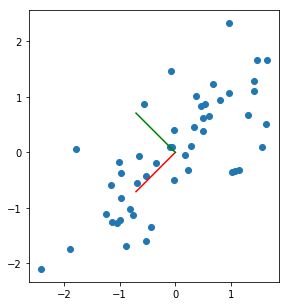

In [6]:
#Plotting the data and the eigenvectors
plt.figure(figsize=(5,5))
plt.scatter(x_scaled[:,0],x_scaled[:,1])
plt.plot([0,eigvec[:,0][0]],[0,eigvec[:,0][1]], c='r')
plt.plot([0,eigvec[:,1][0]],[0,eigvec[:,1][1]], c='g')
plt.axis('scaled')

In [7]:
#projection 
def projectData(x,eigvec,k):
    # Note x is a scaled matrix
    return np.matmul(x,eigvec[:,0:k])

#Reconstruction
def recoverData(z,eigvec,k):
    # Note x is a scaled matrix
    return np.matmul(z,eigvec[:,0:k].T)

In [8]:
#Loading the face data
Faces = lm.loadmat('ex7faces.mat')
faces = Faces['X']

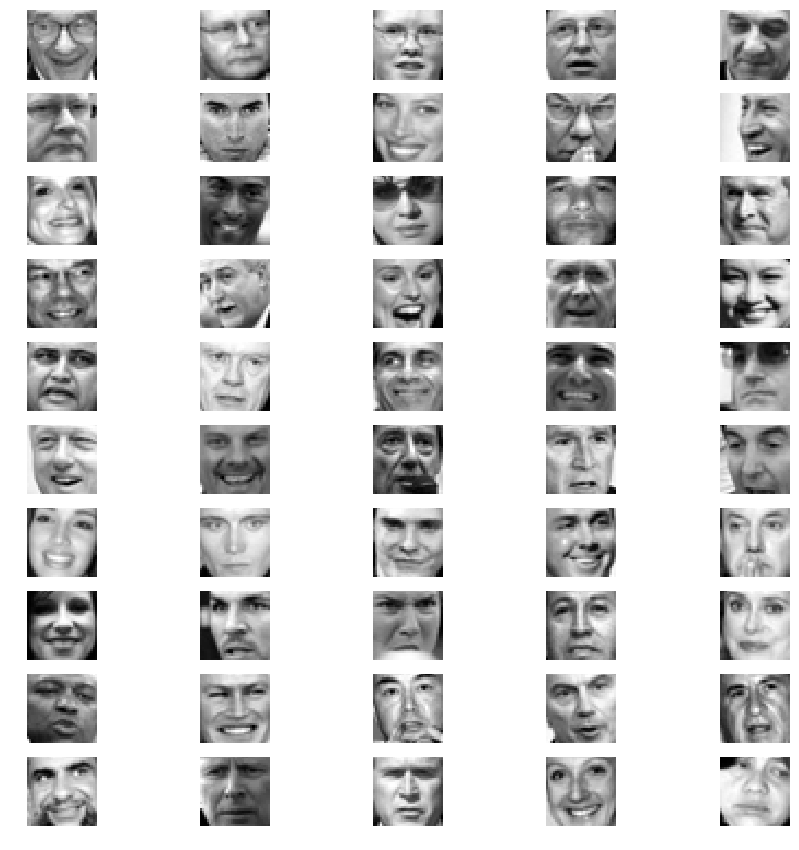

In [9]:
#Plotting the first 50 faces
plt.figure(figsize=(15,15))
for i in range(0,50):
    plt.subplot(10,5,i+1)
    plt.imshow(faces[i].reshape(32,32).T,cmap='gray')
    plt.axis('off')

In [10]:
# Center and scale the face data
faces_scaled,mean_face,sd_face = normalize_Scale(faces)
cov = np.matmul(faces_scaled.T,faces_scaled)/(faces_scaled.shape[0]*1.0)
eigvec,eigval = np.linalg.svd(cov)[0:2]

These 36 eigenvectors explain 83.118461 percent of the variation in data 


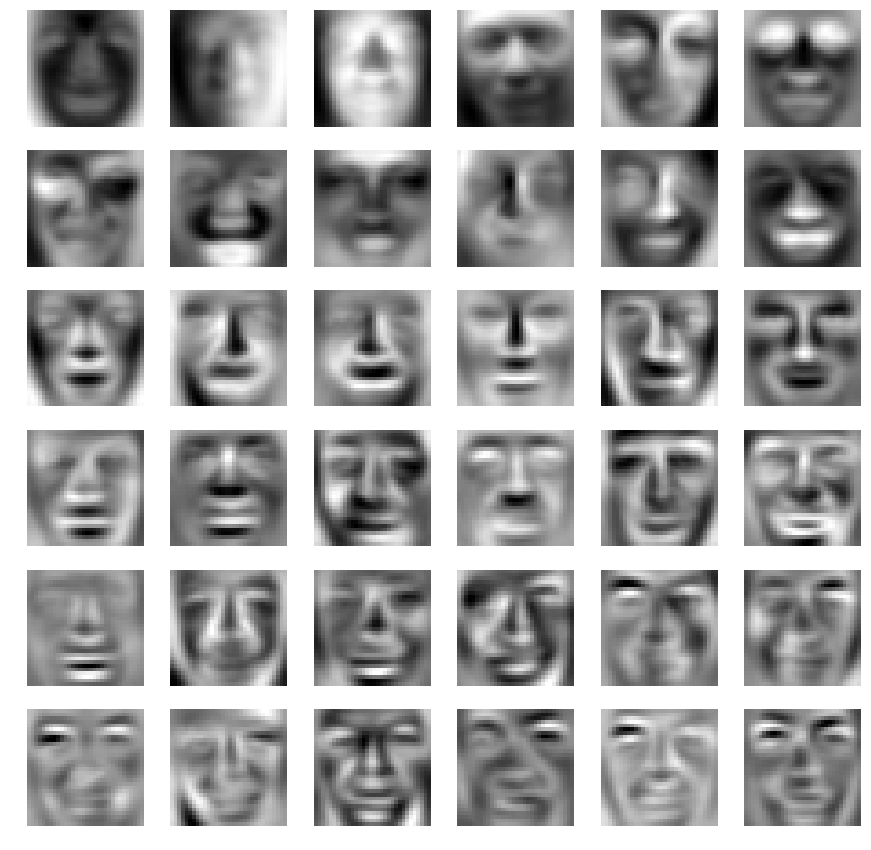

In [11]:
#first 36 eigenvectors 
plt.figure(figsize=(15,15))
for i in range(0,36):
    plt.subplot(6,6,i+1)
    plt.imshow(eigvec[:,i].reshape(32,32).T,cmap='gray')
    plt.axis('off')
print "These 36 eigenvectors explain %f percent of the variation in data " %(sum(eigval[0:36])/sum(eigval) *100)

In [12]:
#Recreating the Orginal Data from the first 36 eigenvectors
rec_faces = recoverData(projectData(faces_scaled,eigvec,36),eigvec,36)
final_face_proj = (rec_faces * sd_face) + mean_face 

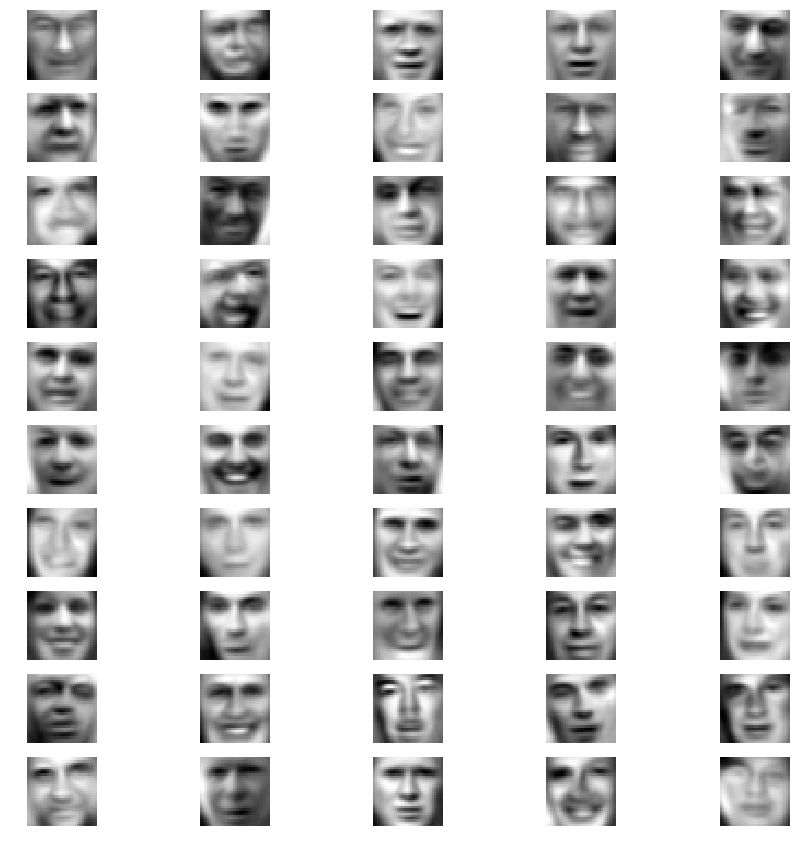

In [13]:
plt.figure(figsize=(15,15))
for i in range(0,50):
    plt.subplot(10,5,i+1)
    plt.imshow(final_face_proj[i].reshape(32,32).T,cmap='gray')
    plt.axis('off')